<a href="https://colab.research.google.com/github/NandaAbhilash/CN6005/blob/main/CN6005Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn import metrics
from yellowbrick.cluster import KElbowVisualizer


In [8]:
df = pd.read_csv("/content/diabetesN.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.info()
df.describe()
df.corr(numeric_only=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [10]:
# Glucose and BMI for 2D visualization
xx = df[['Glucose', 'BMI']]
xx.head()


,Glucose,BMI
0,148,33.6
1,85,26.6
2,183,23.3
3,89,28.1
4,137,43.1


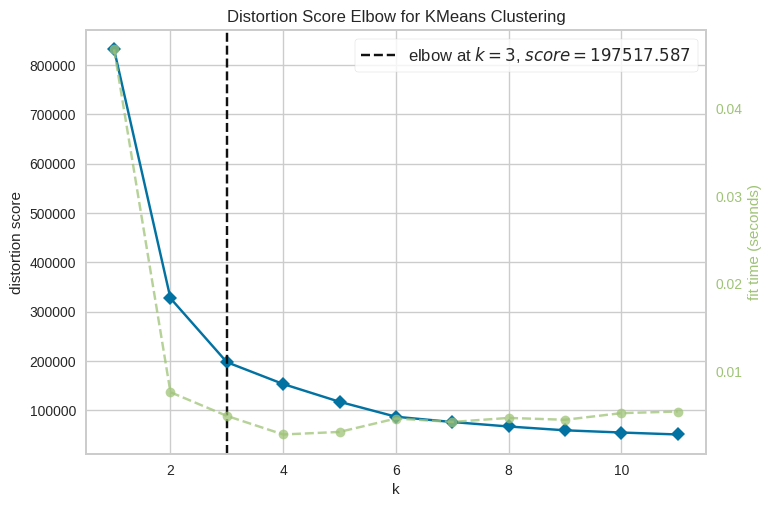

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(xx)
visualizer.show()


In [12]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(xx)
df['Clus_km'] = kmeans.labels_
df.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Clus_km
0,6,148,72,35,0,33.6,0.627,50,1,2
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,2
5,5,116,74,0,0,25.6,0.201,30,0,2
6,3,78,50,32,88,31.0,0.248,26,1,0
7,10,115,0,0,0,35.3,0.134,29,0,2
8,2,197,70,45,543,30.5,0.158,53,1,1
9,8,125,96,0,0,0.0,0.232,54,1,2


In [13]:
print("Cluster centers:\n", kmeans.cluster_centers_)

from collections import Counter
print("Cluster sizes:", Counter(kmeans.labels_))


Cluster centers:
 [[ 92.01597444  30.18658147]
 [171.03496503  35.16713287]
 [126.88461538  32.34935897]]
Cluster sizes: Counter({np.int32(0): 313, np.int32(2): 312, np.int32(1): 143})


In [14]:
clusters = kmeans.labels_.tolist()
clustervalidation = metrics.silhouette_score(xx, clusters, metric='euclidean')
print("Silhouette Score:", clustervalidation)


Silhouette Score: 0.4586523405146536


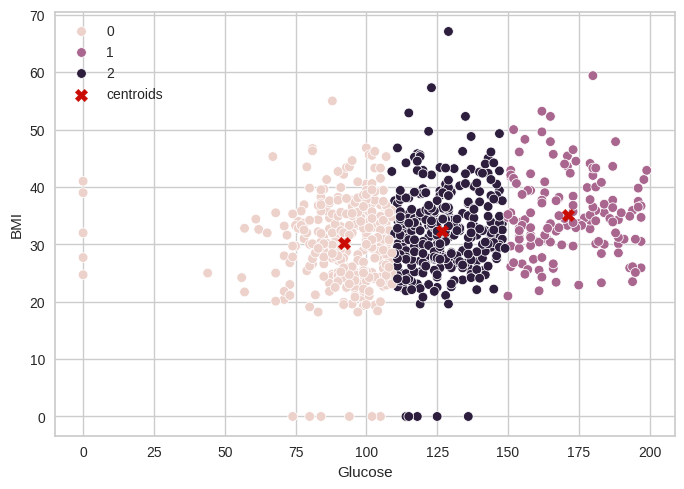

In [15]:
sns.scatterplot(data=xx, x="Glucose", y="BMI", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()


In [16]:
newdata = [[120, 32], [150, 40], [80, 25]]
d = pd.DataFrame(newdata, columns=['Glucose','BMI'])
predictedClusters = kmeans.predict(d)

print(d)
print("Predicted Clusters:", predictedClusters)


   Glucose  BMI
0      120   32
1      150   40
2       80   25
Predicted Clusters: [2 1 0]
